# TensorFlow 2 & Keras with Fashion-MNIST

In this TP we will uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.
4. Analyse the detail of the predictions
5. Test alternative models (convolution)

Download and install the TensorFlow 2 package. Import TensorFlow into your program:

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

#from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Load and prepare the [FMNIST dataset](https://github.com/zalandoresearch/fashion-mnist/). Convert the samples from integers to floating-point numbers:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

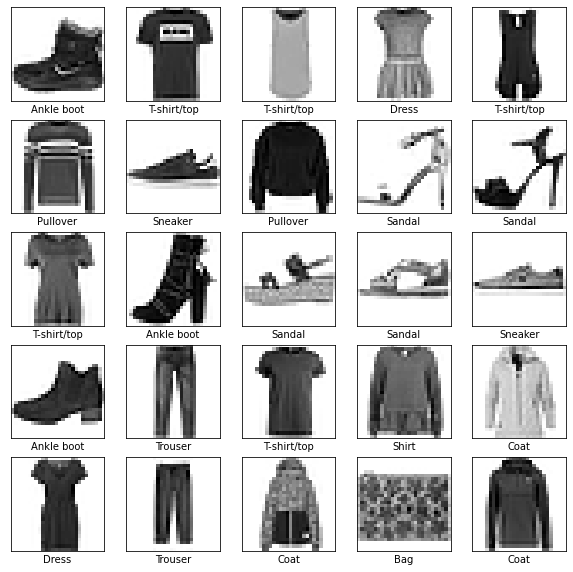

In [4]:
#plot the 25 first image of the train data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train and evaluate the model:

In [9]:
model1.fit(x_train, y_train, epochs=5)

model1.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5042 - accuracy: 0.8216
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3804 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8920
313/313 - 1s - loss: 0.3684 - accuracy: 0.8683


[0.36841070652008057, 0.8683000206947327]

The image classifier is now trained to ~87% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

Predict the labels of `x_test`, then check the prediction of the 1st image and display the corresponding image.

In [10]:
predictions = model1.predict(x_test)

In [11]:
print(predictions[0])


[2.1497860e-04 3.2205746e-05 5.9391127e-06 8.9329660e-06 4.9670493e-06
 7.7011003e-03 1.6425407e-04 8.7903604e-02 2.2991301e-04 9.0373409e-01]


In [12]:
np.argmax(predictions[0])

9

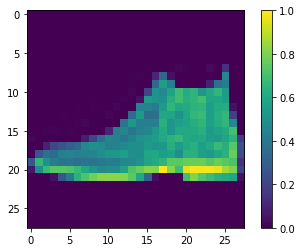

In [13]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [14]:
#plotting functions
#if the classification is correct, the caption will be blue, otherwise it'll be red


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


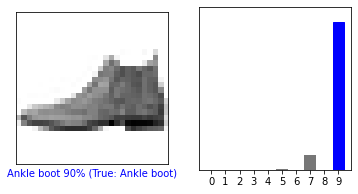

In [15]:
#plot the image 0 with the probability for each class
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [16]:
#select only the max probability for each prediction 
probs = np.amax(predictions, axis=1)

In [17]:
#create a list of indexes corresponding to the prediction sorted from the lowest to the highest 
indexes = list(range(len(probs)))
indexes.sort(key=probs.__getitem__)

In [18]:
#print the index of the lowest propability
indexes[0]

1399

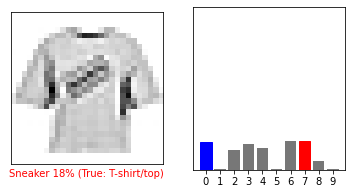

In [19]:
#plot the image of the test image which has the lowest probability 
i = indexes[0]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

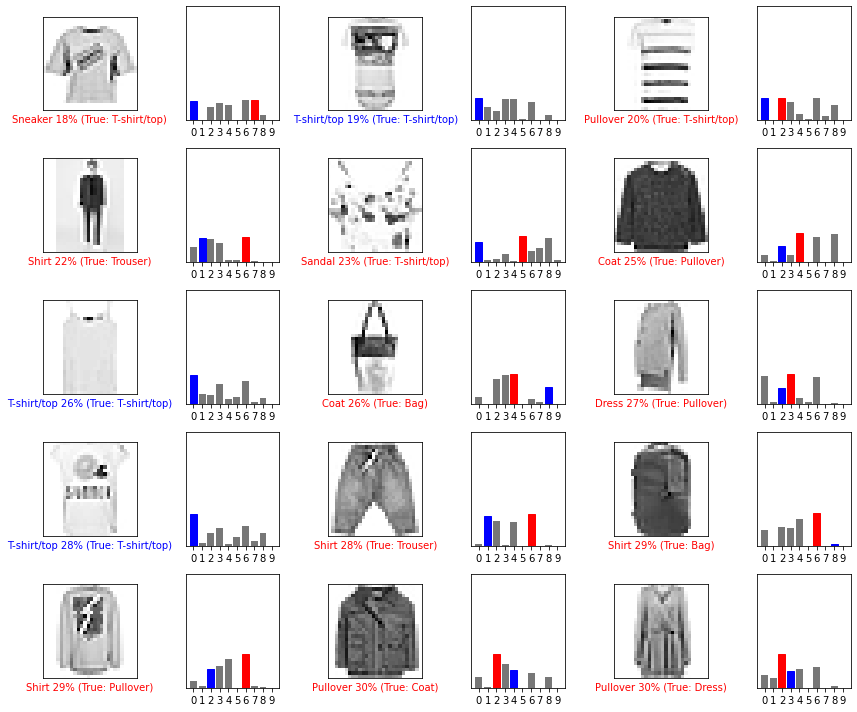

In [20]:
#plot the 15 images with the lowest probability
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexes[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()



Afficher les 25 images ayand la probabilité max la plus faible. \\
Afficher 25 images mal reconnues

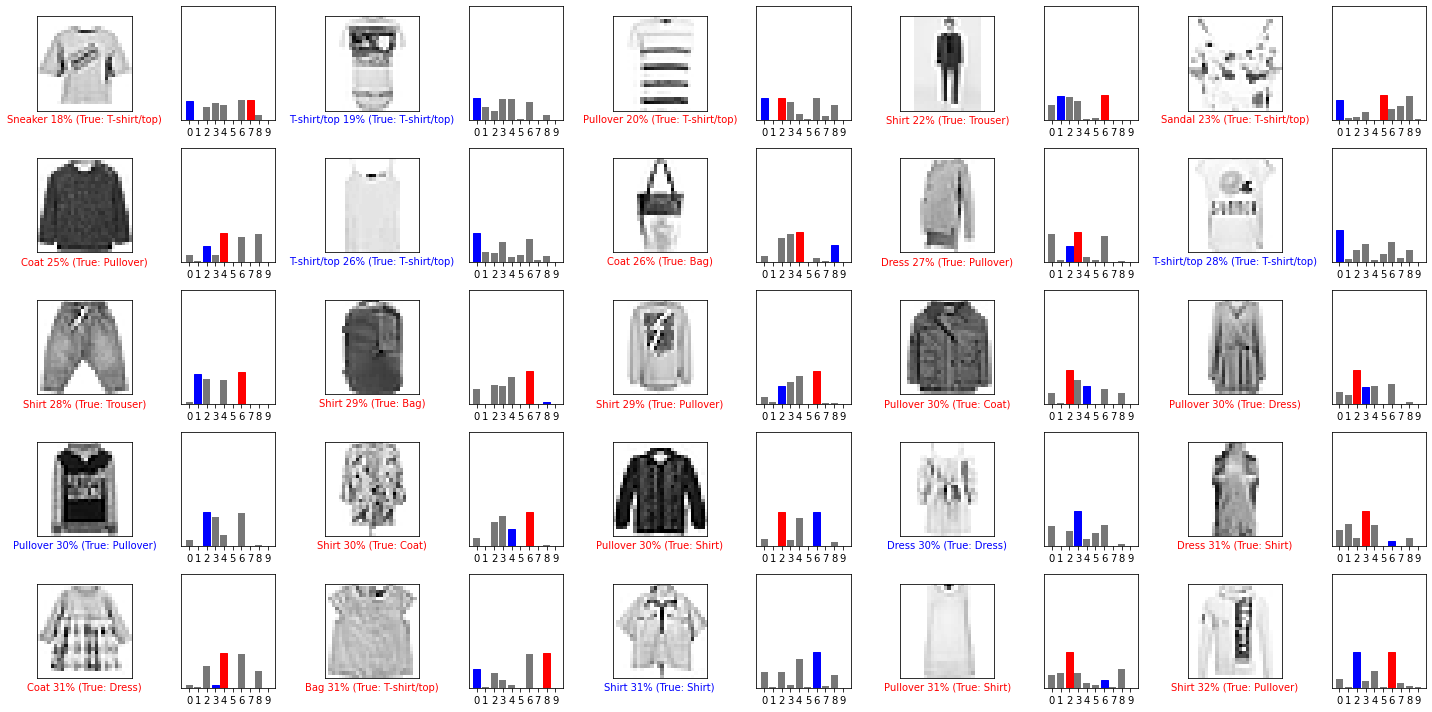

In [23]:
#Afficher les 25 images ayand la probabilité max la plus faible.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexes[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

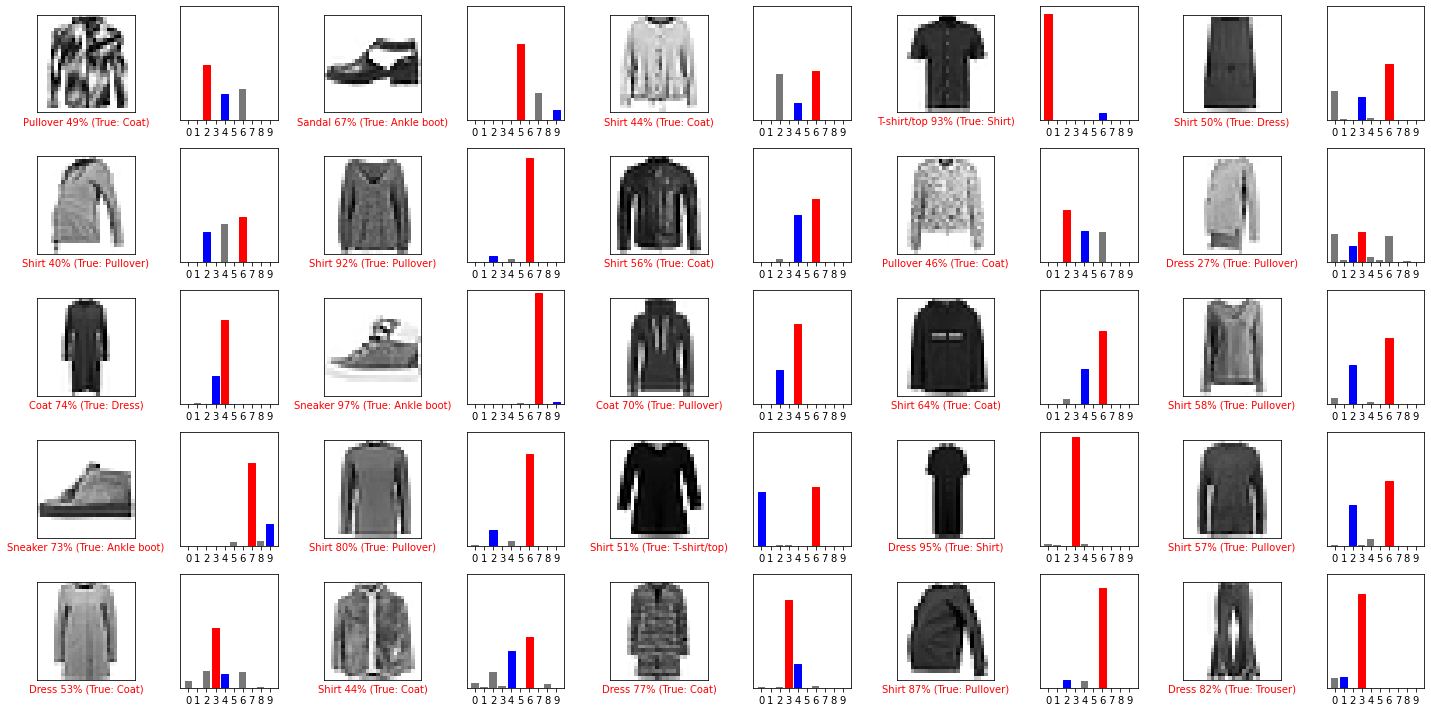

In [28]:
indexesR = [i for i in range(len(verif)) if not verif[i]]
indexesR = indexesR[:25]


#plot the 25 images with the lowest probability
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexesR[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [21]:
# count the number of misclassifications
decision =  np.argmax(predictions,axis=1)
verif = decision == y_test
10000-sum(verif)

1317

Optional exercise: plot the worst problems (high confidence, but wrong decision)

Reshape the images and create a new model with a convolutional layer 

In [27]:
#For convolution we need (60000,28,28,1)
train_images = x_train.reshape((60000, 28, 28, 1))
test_images = x_test.reshape((10000,28,28,1))

In [29]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [31]:
model2.fit(train_images, y_train, epochs=5)

model2.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4192 - accuracy: 0.8521
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2827 - accuracy: 0.8963
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2348 - accuracy: 0.9128
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2003 - accuracy: 0.9257
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1710 - accuracy: 0.9352
313/313 - 1s - loss: 0.2773 - accuracy: 0.9085


[0.27727681398391724, 0.9085000157356262]

There are too many parameters (2 770 634 !!) and it takes a long time for training. Add a maxpooling2D layer to reduce the size

In [32]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.MaxPool2D((2,2)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [34]:
model3.fit(train_images, y_train, epochs=5)

model3.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4972 - accuracy: 0.8195
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3439 - accuracy: 0.8753
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3056 - accuracy: 0.8871
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2798 - accuracy: 0.8964
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2603 - accuracy: 0.9033
313/313 - 1s - loss: 0.2782 - accuracy: 0.8995


[0.27817556262016296, 0.8995000123977661]

Stack convolutional and maxpool layers

In [35]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                     
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

In [37]:
model4.fit(train_images, y_train, epochs=5)

model4.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6734 - accuracy: 0.7531
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4431 - accuracy: 0.8392
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3836 - accuracy: 0.8596
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3483 - accuracy: 0.8715
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3214 - accuracy: 0.8823
313/313 - 1s - loss: 0.3513 - accuracy: 0.8743


[0.3513101041316986, 0.8743000030517578]

We get almost same performance with a much smaller model (thanks to the image processing by convolution)